<a href="https://colab.research.google.com/github/AleksLZCR/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW7 - Aleksandr Cooper

20.1 - Numerical Differentiation
*   Numerical Grid: An evenly spaced set of points over thee domain of a function over some interval
*   Spacing (Step Size): Distance between adjacent points on a grid
*   A common theme in this class, Python can be used to generate a numerical grid


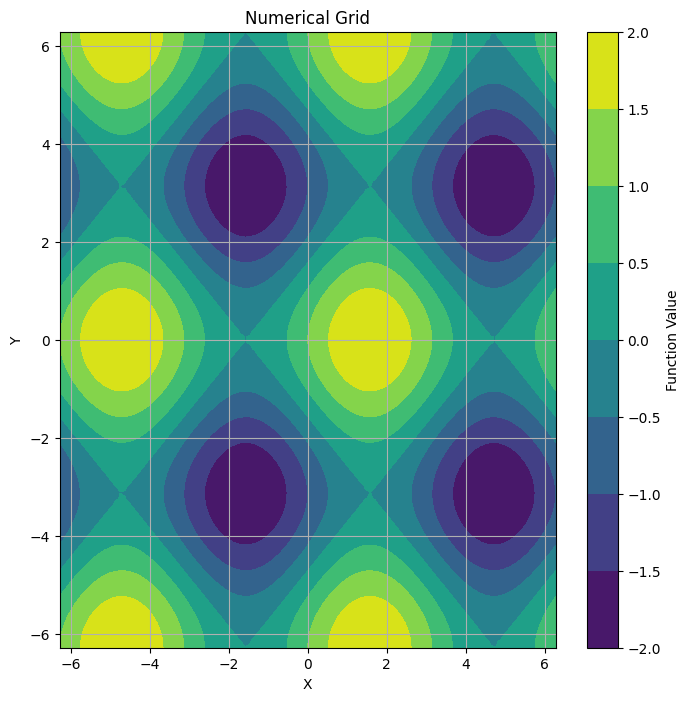

In [26]:
# Using Python to generate a numerical grid for the function sin(x) + cos(y)

import numpy as np
import matplotlib.pyplot as plt

def generate_grid(x_start, x_end, y_start, y_end, num_points_x, num_points_y):
    x = np.linspace(x_start, x_end, num_points_x)
    y = np.linspace(y_start, y_end, num_points_y)
    X, Y = np.meshgrid(x, y)
    return X, Y

# Define range and # of points for the grid
x_start, x_end = -2*np.pi, 2*np.pi
y_start, y_end = -2*np.pi, 2*np.pi
num_points_x, num_points_y = 100, 100
X, Y = generate_grid(x_start, x_end, y_start, y_end, num_points_x, num_points_y)

# Evaluate function over the grid
Z = np.sin(X) + np.cos(Y)

# Plot the numerical grid
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Numerical Grid')
plt.grid(True)
plt.show()

20.2 - Finite Difference Approximating Derivatives

*   As we know, the derivative of a function at point a is the slope of the function at point a.
*   For finite difference approximations, values of the function near point 'a' can be used.
*   Forward Difference: Estimate the slope of the function at xj using the line that connects (xj, f(xj)) and (xj+1, f(xj+1))
*   Backward Difference: Estimate the slope of the function at xj using the line that connects (xj-1, f(xj-1)) and (xj, f(xj))
*   Central Difference: Estimate the slope of the function at xj using the line that connects (xj-1, f(xj-1)) and (xj+1, f(xj+1))
*   These implementations can also be achieved via Taylor Series



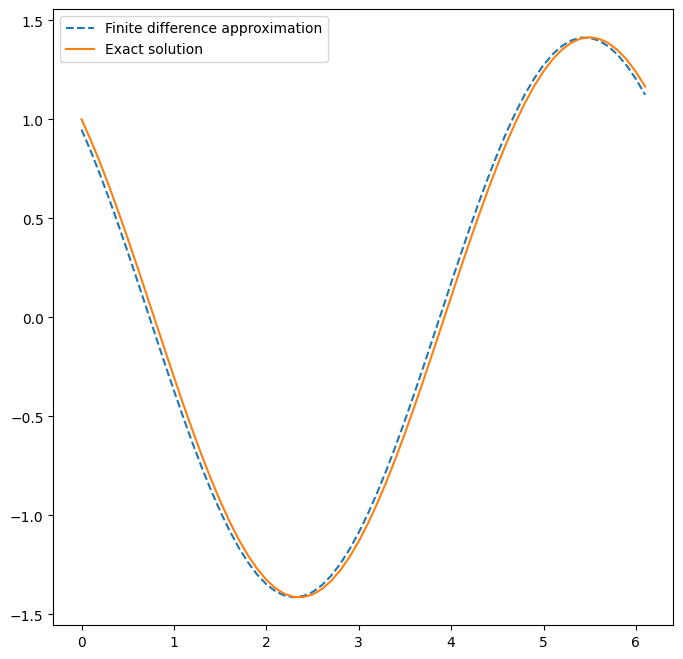

Max Error: 0.07068961714190192


In [27]:
# An example of using forward difference to estimate a derivative using Python

import numpy as np
import matplotlib.pyplot as plt

h = 0.1 # step size
x = np.arange(0, 2*np.pi, h)
y = np.cos(x) + np.sin(x)

forward_diff = np.diff(y)/h       # compute vector of forward differences
x_diff = x[:-1:]                  # compute corresponding grid
exact_solution = np.cos(x_diff) -np.sin(x_diff)  # compute exact solution


# Plot solution
plt.figure(figsize = (8, 8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution,     label = 'Exact solution')
plt.legend() ; plt.show()

# Compute max error between numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print("Max Error: " + str(max_error))

As we can see, the error is very small for this approximation meaning it would be a good approximation to use.

20.3 - Approximating of Higher Order Derivatives

*   To approximate higher order derivatives, we can employ Taylor Series

20.4 - Numerical Differentiation with Noise

*   Data can be contaminated with noise
*   Its value can be off by a small amount compared to a mathematical calculation
*   This influence can be small but it can also be large. In this case, the resulting approximation may not be usable depending on the application.


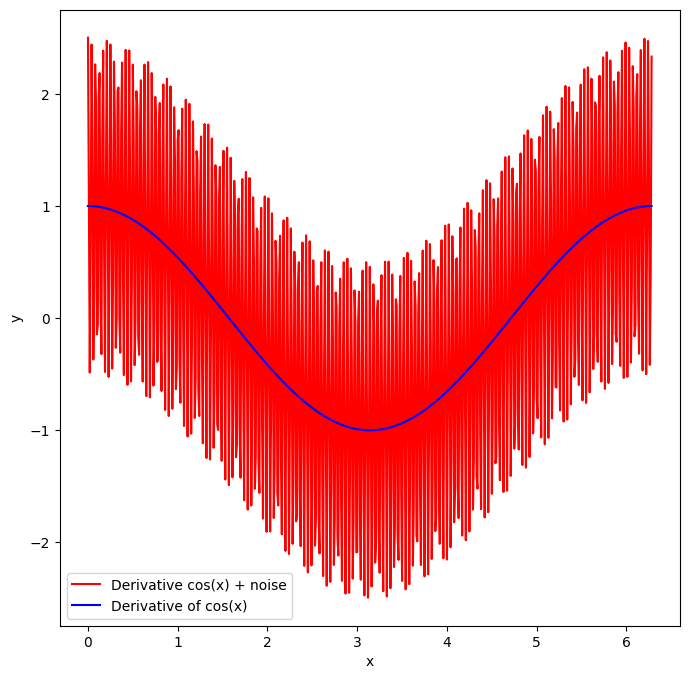

In [28]:
# Data approximation with Noise
x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 150
epsilon = 0.01

x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = np.cos(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (8, 8))
plt.plot(x, y_noise, 'r-',  label = 'Derivative cos(x) + noise')
plt.plot(x, y      , 'b-',  label = 'Derivative of cos(x)')

plt.xlabel('x') ; plt.ylabel('y')
plt.legend()    ; plt.show()

In a situation requiring a high degree of accuracy, this would not be usable.